In [1]:
!pip install --upgrade Pillow -q

In [2]:
!pip install ydata-profiling -q

In [3]:
!pip install scikit-learn==1.1.3 -q

# Прогнозирование оттока клиентов в телекоммуникационной компании

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-ознакомление-с-данными" data-toc-modified-id="Загрузка-и-ознакомление-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и ознакомление с данными</a></span><ul class="toc-item"><li><span><a href="#Данные-Phone" data-toc-modified-id="Данные-Phone-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Данные Phone</a></span></li><li><span><a href="#Данные-internet" data-toc-modified-id="Данные-internet-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Данные internet</a></span></li><li><span><a href="#Данные-Personal" data-toc-modified-id="Данные-Personal-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Данные Personal</a></span></li><li><span><a href="#Данные-Contract" data-toc-modified-id="Данные-Contract-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Данные Contract</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#CatBoostClassifier" data-toc-modified-id="CatBoostClassifier-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>CatBoostClassifier</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Анализ-важности-признаков" data-toc-modified-id="Анализ-важности-признаков-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Анализ важности признаков</a></span></li></ul></li><li><span><a href="#Отчет-о-проделанной-работе" data-toc-modified-id="Отчет-о-проделанной-работе-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Отчет о проделанной работе</a></span></li></ul></div>

# Описание проекта:

Целью данного проекта является разработка модели прогнозирования оттока клиентов для телекоммуникационной компании "Ниединогоразрыва.ком".

Для достижения поставленной цели мы располагаем данными о клиентах, информацией о договорах, услугах интернета и телефонии, а также персональными данными клиентов. Эти данные представлены в виде четырех файлов: 
- `contract_new.csv`
- `personal_new.csv`
- `internet_new.csv`
- `phone_new.csv`

Основной задачей проекта является бинарная классификация клиентов на два класса: `ушел` и `не ушел`. Мы будем использовать метрику `AUC-ROC`, чтобы оценить качество модели. Целевое значение `AUC-ROC` составляет не менее `0.85`. Это важно для бизнеса, поскольку компания стремится снизить убытки, связанные с предложением промокодов нежелающим уходить пользователям и уходом клиентов без предложения промокодов.

Дополнительно мы будем вычислять точность `accuracy` в качестве дополнительной метрики для оценки общей эффективности модели.

Описание полей данных:

- `BeginDate` - дата начала пользования услугами,

- `EndDate` - дата окончания пользования услугами,

- `Туре` — тип оплаты: ежемесячный, годовой и тд,

- `PaperlessBilling` - электронный платёжный документ,

- `PaymentMethod` — способ оплаты,

- `MonthlyCharges` — ежемесячные траты на услуги,

- `TotalCharges` — всего потрачено денег на услуги

- `Dependents` — наличие иждивенцев

- `Senior Citizen` — наличие пенсионного статуса по возрасту

- `Partner` - наличие супруга(и)

- `Multiplelines` — наличие возможности ведения параллельных линий во время звонка


# План работы 

1. Загрузка и ознакомление с данными:

    - Загрузить файлы phone_new.csv, internet_new.csv, personal_new.csv и contract_new.csv.
    - Используя профилирование данных получить общую информацию о каждом наборе данных, включая статистические показатели, типы переменных, пропущенные значения и уникальные значения.
    
    
2. Предварительная обработка данных:

   - Объединить наборы данных по общему идентификатору клиента customerID.
   - Удалить ненужные столбцы, если они не представляют ценности для модели.
   - Обработать пропущенные значения, если они есть.
   - Преобразовать категориальные переменные в числовые (например, с помощью кодирования One-Hot или Label Encoding) для возможности использования их в модели.
   
   
3. Подготовка данных для моделирования:

    - Разделить данные на обучающий набор и тестовый набор с использованием подходящего метода (например, случайное разделение или перекрестная проверка).
    - Произвести масштабирование признаков, если это необходимо, чтобы обеспечить одинаковый масштаб значений между разными признаками.
    
    
4. Построение модели:

   - Выбрать подходящий алгоритм машинного обучения для задачи бинарной классификации, например, логистическую регрессию, случайный лес или градиентный бустинг.
   - Обучить модель на обучающем наборе данных.
   - Провести кросс-валидацию модели для оценки ее обобщающей способности.
   - Сравнить производительность различных моделей и выбрать наилучшую модель на основе выбранных метрик.
   - Проанализировать важность признаков, чтобы понять, какие факторы оказывают наибольшее влияние на прогнозы модели.
   
   
5. Тестирование модели:

   - Проверить модель на тестовом наборе данных для окончательной оценки ее производительности.

   - Предоставить выводы и рекомендации на основе результатов моделирования.
   
   
6. Отчет:

   - Создать отчет, содержащий описание процесса работы, примененные методы, полученные результаты и выводы.

## Загрузка и ознакомление с данными

In [4]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import phik
import warnings

#модели
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import(
    train_test_split,
    cross_val_score,
    RandomizedSearchCV,
    GridSearchCV
)

from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    roc_curve,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
    make_scorer
)

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


pd.set_option('display.max_columns', None)

warnings.filterwarnings("ignore", category=FutureWarning)

RANDOM_STATE = 220523

In [5]:
#загрузка дынных
try:
    phone = pd.read_csv('C:/Users/nedel/Desktop/Projects/phone_new.csv')
    internet = pd.read_csv('C:/Users/nedel/Desktop/Projects/internet_new.csv')
    personal = pd.read_csv('C:/Users/nedel/Desktop/Projects/personal_new.csv')
    contract = pd.read_csv('C:/Users/nedel/Desktop/Projects/contract_new.csv')
except:
    phone = pd.read_csv('/datasets/phone_new.csv')
    internet = pd.read_csv('/datasets/internet_new.csv')
    personal = pd.read_csv('/datasets/personal_new.csv')
    contract = pd.read_csv('/datasets/contract_new.csv')

### Данные Phone

In [6]:
#изучим датасет
ProfileReport(phone)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
ProfileReport(phone, correlations={'phi_k': {'calculate': True},
             'cramers': {'calculate': True}})

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

В датасете `phone` содержатся два столбца: `customerID` и `MultipleLines`.

- `customerID` - идентификатор клиента, содержит 6361 уникальное значение.

- `MultipleLines` - имеется два уникальных значения: False `3390` наблюдений и True `2971` наблюдений. 

- В данных нет пропущенных значений и дубликатов.

### Данные internet

In [8]:
#изучим датасет
ProfileReport(internet, correlations={'phi_k': {'calculate': True},
             'cramers': {'calculate': True}})

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

В датасете `internet`:

- `customerID` - содержит 5517 уникальных значений.

- `InternetService` - Это категориальная переменная, указывающая тип интернет-сервиса, который использует клиент. В данном случае имеется два уникальных значения: `Fiber optic` - 3096 наблюдений и `DSL` - 2421 наблюдение.

- `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies` - Это булевы переменные, указывающие, подключены ли соответствующие услуги клиентом `True` или нет `False`.

- В данных нет пропущенных значений и дубликатов.

### Данные Personal

In [9]:
#изучим датасет
ProfileReport(personal, correlations={'phi_k': {'calculate': True},
             'cramers': {'calculate': True}})

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

В датасете `personal`:

- `customerID` - имеет 7043 уникальных значений.

- `gender` - указывает пол клиента. Имеется два уникальных значения:
   - `Male` - 3555 наблюдений
   - `Female` - 3488 наблюдений

- `SeniorCitizen` - Имеется два уникальных значения: 0 (5901 наблюдение) и 1 (1142 наблюдения).

- `Partner` и `Dependents` - Это булевы переменные, указывающие, есть ли у клиента супруга(и) и иждивенцы . У каждой переменной есть два уникальных значения: `False` и `True`.
- В данных нет пропущенных значений и дубликатов.

### Данные Contract

In [10]:
#изучим датасет
ProfileReport(contract, correlations={'phi_k': {'calculate': True},
             'cramers': {'calculate': True}})

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

В датасете `contract`:

- `customerID` - содержит 7043 уникальных значений.

- `BeginDate` - содержит 77 уникальных значений.

- `EndDate` - является целевым признаком и содержит 67 уникальных значений с датами ухода клиентов, а так же значение `No` для клиентов, которые продолжают пользоваться услугами компании.

- `Type` - Это категориальная переменная, указывающая тип контракта. У нее есть три уникальных значения: 
   - `Month-to-month`
   - `Two year`
   - `One year`
   
- `PaperlessBilling` - Это булева переменная, указывающая, используется ли электронный платежный документ. У нее есть два уникальных значения: `False` и `True`.

- `PaymentMethod` - Это категориальная переменная, указывающая метод оплаты. У нее есть четыре уникальных значения:
   - `Electronic check`
   - `Mailed check`
   - `Bank transfer (automatic)`
   - `Credit card (automatic)`.
   
- `MonthlyCharges` - Это числовая переменная, представляющая ежемесячные платежи клиента. У нее есть `1585` уникальных значений.

- `TotalCharges` : Это категориальная переменная представляющая общую сумму платежей клиента. У нее есть `6658` уникальных значений.

In [11]:
contract.query('TotalCharges == " "')

customerID   BeginDate EndDate      Type PaperlessBilling  \
488   4472-LVYGI  2020-02-01      No  Two year              Yes   
753   3115-CZMZD  2020-02-01      No  Two year               No   
936   5709-LVOEQ  2020-02-01      No  Two year               No   
1082  4367-NUYAO  2020-02-01      No  Two year               No   
1340  1371-DWPAZ  2020-02-01      No  Two year               No   
3331  7644-OMVMY  2020-02-01      No  Two year               No   
3826  3213-VVOLG  2020-02-01      No  Two year               No   
4380  2520-SGTTA  2020-02-01      No  Two year               No   
5218  2923-ARZLG  2020-02-01      No  One year              Yes   
6670  4075-WKNIU  2020-02-01      No  Two year               No   
6754  2775-SEFEE  2020-02-01      No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges  
488   Bank transfer (automatic)           52.55               
753                Mailed check           20.25               
936                Mailed check           80.85               
1082               Mailed check           25.75               
1340    Credit card (automatic)           56.05               
3331               Mailed check           19.85               
3826               Mailed check           25.35               
4380               Mailed check           20.00               
5218               Mailed check           19.70               
6670               Mailed check           73.35               
6754  Bank transfer (automatic)           61.90

В столбце `TotalCharges` присутствуют пустые строки. Эти клиенты начали пользоваться услугами в день выгрузки данных. Заменим пропуски значением столбца `MonthlyCharges`

In [12]:
contract.loc[contract['TotalCharges'] == ' ', 'TotalCharges'] = contract['MonthlyCharges']

Вывод:

- Все файлы не содержат пропущенных значений и дубликатов.
- Переменная `EndDate` в файле `contract_new.csv` является целевым признаком, указывающим на дату ухода клиента. Она содержит 67 уникальных значений с датами ухода клиентов, а также значение `No`, если клиент не ушел.
- Для выполнения задачи бинарной классификации мы можем использовать данные из всех четырех файлов, объединив их по признаку `customerID`.

## Предобработка данных

Объединим данные

In [13]:
df = personal.merge(phone, on='customerID', how='left')\
    .merge(internet, on='customerID', how='left')\
    .merge(contract, on='customerID', how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   MultipleLines     6361 non-null   object 
 6   InternetService   5517 non-null   object 
 7   OnlineSecurity    5517 non-null   object 
 8   OnlineBackup      5517 non-null   object 
 9   DeviceProtection  5517 non-null   object 
 10  TechSupport       5517 non-null   object 
 11  StreamingTV       5517 non-null   object 
 12  StreamingMovies   5517 non-null   object 
 13  BeginDate         7043 non-null   object 
 14  EndDate           7043 non-null   object 
 15  Type              7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Приведем столбцы к `sanke_case`

In [14]:
df.columns = (df.columns
                .str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True)
                .str.lower())

In [15]:
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'begin_date', 'end_date', 'type',
       'paperless_billing', 'payment_method', 'monthly_charges',
       'total_charges'],
      dtype='object')

Заполним пропуски после объединиения. Заполнять будем значением `No`, т.к. если у пользователя стоит пропуск в той или иной услуге, значит он ей не пользуется.

In [16]:
df[['internet_service',
    'online_security',
    'online_backup',
    'device_protection',
    'tech_support',
    'streaming_tv',
    'streaming_movies',
    'multiple_lines']] = df[['internet_service',
                             'online_security',
                             'online_backup',
                             'device_protection',
                             'tech_support',
                             'streaming_tv',
                             'streaming_movies',
                             'multiple_lines']].fillna('No')

In [17]:
df.sample(15)

customer_id  gender  senior_citizen partner dependents multiple_lines  \
1095  7439-DKZTW    Male               0      No         No             No   
1340  1371-DWPAZ  Female               0     Yes        Yes             No   
2195  9891-NQDBD  Female               0     Yes         No            Yes   
5986  5271-DBYSJ    Male               1      No         No             No   
6860  0402-CQAJN  Female               0      No         No            Yes   
3611  5693-PIPCS    Male               0      No         No             No   
1443  7055-HNEOJ    Male               0     Yes         No             No   
4643  1230-QAJDW    Male               0      No         No            Yes   
737   2521-NPUZR    Male               0     Yes         No             No   
4577  0471-ARVMX  Female               1     Yes         No            Yes   
5304  6078-VESFR    Male               1     Yes         No             No   
1528  8096-LOIST  Female               0      No         No             No   
6335  7798-JVXYM  Female               0      No         No             No   
5233  0302-JOIVN  Female               0     Yes         No             No   
2692  5445-GLVOT  Female               0      No         No             No   

     internet_service online_security online_backup device_protection  \
1095      Fiber optic              No            No                No   
1340              DSL             Yes           Yes               Yes   
2195               No              No            No                No   
5986      Fiber optic              No            No                No   
6860      Fiber optic              No           Yes               Yes   
3611      Fiber optic              No           Yes                No   
1443              DSL              No            No               Yes   
4643              DSL              No            No                No   
737       Fiber optic             Yes           Yes               Yes   
4577      Fiber optic             Yes            No               Yes   
5304      Fiber optic              No            No                No   
1528              DSL              No            No                No   
6335              DSL              No            No                No   
5233      Fiber optic              No           Yes               Yes   
2692              DSL             Yes            No                No   

     tech_support streaming_tv streaming_movies  begin_date    end_date  \
1095           No          Yes               No  2020-01-01          No   
1340          Yes          Yes               No  2020-02-01          No   
2195           No           No               No  2017-10-01          No   
5986           No           No              Yes  2019-03-01          No   
6860           No          Yes              Yes  2016-10-01  2018-05-01   
3611          Yes          Yes              Yes  2016-09-01          No   
1443          Yes           No               No  2019-11-01          No   
4643          Yes          Yes               No  2019-11-01          No   
737           Yes           No              Yes  2014-04-01          No   
4577           No          Yes              Yes  2014-12-01  2019-12-01   
5304           No           No               No  2019-01-01          No   
1528           No           No              Yes  2018-07-01          No   
6335          Yes          Yes              Yes  2018-12-01          No   
5233           No          Yes              Yes  2019-05-01          No   
2692           No           No               No  2018-04-01          No   

                type paperless_billing             payment_method  \
1095  Month-to-month               Yes           Electronic check   
1340        Two year                No    Credit card (automatic)   
2195        One year                No               Mailed check   
5986  Month-to-month               Yes    Credit card (automatic)   
6860  Month-to-month               Yes  B

Заменим `No` в столбце `end_date` на дату выгрузки данных

In [18]:
df['end_date'] = df['end_date'].replace('No', '2020-02-01')

Приведем даты к формату `datetime`

In [19]:
df['begin_date'] = pd.to_datetime(df['begin_date'],format = '%Y-%m-%d')
df['end_date'] = pd.to_datetime(df['end_date'],format = '%Y-%m-%d')

Приведем столбец `total_charges` к числовому формату

In [20]:
df['total_charges'] = pd.to_numeric(df['total_charges'])

In [21]:
df['total_charges'].value_counts()

20.45      6
101.00     5
19.65      4
732.60     4
40.10      4
          ..
3716.34    1
188.10     1
1213.10    1
2035.20    1
96.94      1
Name: total_charges, Length: 6664, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   gender             7043 non-null   object        
 2   senior_citizen     7043 non-null   int64         
 3   partner            7043 non-null   object        
 4   dependents         7043 non-null   object        
 5   multiple_lines     7043 non-null   object        
 6   internet_service   7043 non-null   object        
 7   online_security    7043 non-null   object        
 8   online_backup      7043 non-null   object        
 9   device_protection  7043 non-null   object        
 10  tech_support       7043 non-null   object        
 11  streaming_tv       7043 non-null   object        
 12  streaming_movies   7043 non-null   object        
 13  begin_date         7043 non-null   datetime64[ns]
 14  end_date

In [23]:
df['internet_service'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: internet_service, dtype: int64

Добавим столбец с целевым признаком, где `1` - клиет ушел, `0` - не ушел.

In [24]:
df['target'] = df['end_date'].apply(lambda x: 0 if x == pd.to_datetime('2020-02-01') else 1)

In [25]:
df['target'].value_counts(normalize=1)

0    0.843675
1    0.156325
Name: target, dtype: float64

Заметен сильный дисбаланс классов, где `0` значений `84%`, а `1` - `15%`.

Создадим признак с длительностью пользования услугами

In [26]:
df['duration_contract'] = (df['end_date'] - df['begin_date']).dt.days

Посмотрим значения столбца `payment_method`

In [27]:
df['payment_method'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment_method, dtype: int64

Создадим признак в котором `1`- использует автоплатеж, `0` - не использует

In [28]:
df['automatic_payment'] = df['payment_method'].apply(
    lambda x: 'Yes' if x in ['Bank transfer (automatic)', 'Credit card (automatic)'] else 'No')

Для удобства и однородности данных заменим числовые значения в `senior_citizen` на строки.

In [29]:
df['senior_citizen'] = df['senior_citizen'].apply(
    lambda x: 'Yes' if x == 1 else 'No')

Вывод:

- Объеденили таблицы
- Привели столбцы к snake_case
- Обработали пропуски и привели столбцы к нужным типам данных
- Добавили столбец с целевым признаком
- Создали признак с длительностью пользования услугами
- Создали признак с использованем автоплатежа
- Наблюдается сильный дисбаланс классов, где 0 значений 84%, а 1 - 15%

## Исследовательский анализ данных

In [30]:
df.info()
df.sample(10)
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   gender             7043 non-null   object        
 2   senior_citizen     7043 non-null   object        
 3   partner            7043 non-null   object        
 4   dependents         7043 non-null   object        
 5   multiple_lines     7043 non-null   object        
 6   internet_service   7043 non-null   object        
 7   online_security    7043 non-null   object        
 8   online_backup      7043 non-null   object        
 9   device_protection  7043 non-null   object        
 10  tech_support       7043 non-null   object        
 11  streaming_tv       7043 non-null   object        
 12  streaming_movies   7043 non-null   object        
 13  begin_date         7043 non-null   datetime64[ns]
 14  end_date

count unique                  top  freq      first  \
customer_id          7043   7043           8637-XJIVR     1        NaT   
gender               7043      2                 Male  3555        NaT   
senior_citizen       7043      2                   No  5901        NaT   
partner              7043      2                   No  3641        NaT   
dependents           7043      2                   No  4933        NaT   
multiple_lines       7043      2                   No  4072        NaT   
internet_service     7043      3          Fiber optic  3096        NaT   
online_security      7043      2                   No  5024        NaT   
online_backup        7043      2                   No  4614        NaT   
device_protection    7043      2                   No  4621        NaT   
tech_support         7043      2                   No  4999        NaT   
streaming_tv         7043      2                   No  4336        NaT   
streaming_movies     7043      2                   No  4311        NaT   
begin_date           7043     77  2014-02-01 00:00:00   366 2013-10-01   
end_date             7043     67  2020-02-01 00:00:00  5942 2014-06-01   
type                 7043      3       Month-to-month  3875        NaT   
paperless_billing    7043      2                  Yes  4171        NaT   
payment_method       7043      4     Electronic check  2365        NaT   
monthly_charges    7043.0    NaN                  NaN   NaN        NaT   
total_charges      7043.0    NaN                  NaN   NaN        NaT   
target             7043.0    NaN                  NaN   NaN        NaT   
duration_contract  7043.0    NaN                  NaN   NaN        NaT   
automatic_payment    7043      2                   No  3977        NaT   

                        last         mean          std    min     25%  \
customer_id              NaT          NaN          NaN    NaN     NaN   
gender                   NaT          NaN          NaN    NaN     NaN   
senior_citizen           NaT          NaN          NaN    NaN     NaN   
partner                  NaT          NaN          NaN    NaN     NaN   
dependents               NaT          NaN          NaN    NaN     NaN   
multiple_lines           NaT          NaN          NaN    NaN     NaN   
internet_service         NaT          NaN          NaN    NaN     NaN   
online_security          NaT          NaN          NaN    NaN     NaN   
online_backup            NaT          NaN          NaN    NaN     NaN   
device_protection        NaT          NaN          NaN    NaN     NaN   
tech_support             NaT          NaN          NaN    NaN     NaN   
streaming_tv             NaT          NaN          NaN    NaN     NaN   
streaming_movies         NaT          NaN          NaN    NaN     NaN   
begin_date        2020-02-01          NaN          NaN    NaN     NaN   
end_date          2020-02-01          NaN          NaN    NaN     NaN   
type                     NaT          NaN          NaN    NaN     NaN   
paperless_billing        NaT          NaN          NaN    NaN     NaN   
payment_method           NaT          NaN          NaN    NaN     NaN   
monthly_charges          NaT    64.761692    30.090047  18.25    35.5   
total_charges            NaT  2115.377573  2112.678861  19.05  436.75   
target                   NaT     0.156325     0.363189    0.0     0.0   
duration_contract        NaT   898.555729    683.13051    0.0   276.0   
automatic_payment        NaT          NaN          NaN    NaN     NaN   

                       50%      75%      max  
customer_id            NaN      NaN      NaN  
gender                 NaN      NaN      NaN  
senior_citizen         NaN      NaN      NaN  
partner                NaN      NaN      NaN  
dependents             NaN      NaN      NaN  
multiple_lines         NaN      NaN      NaN  
internet_service       NaN      NaN      NaN  
online_security        NaN      NaN      NaN  
online_backup          NaN      NaN      NaN  
device_protection   

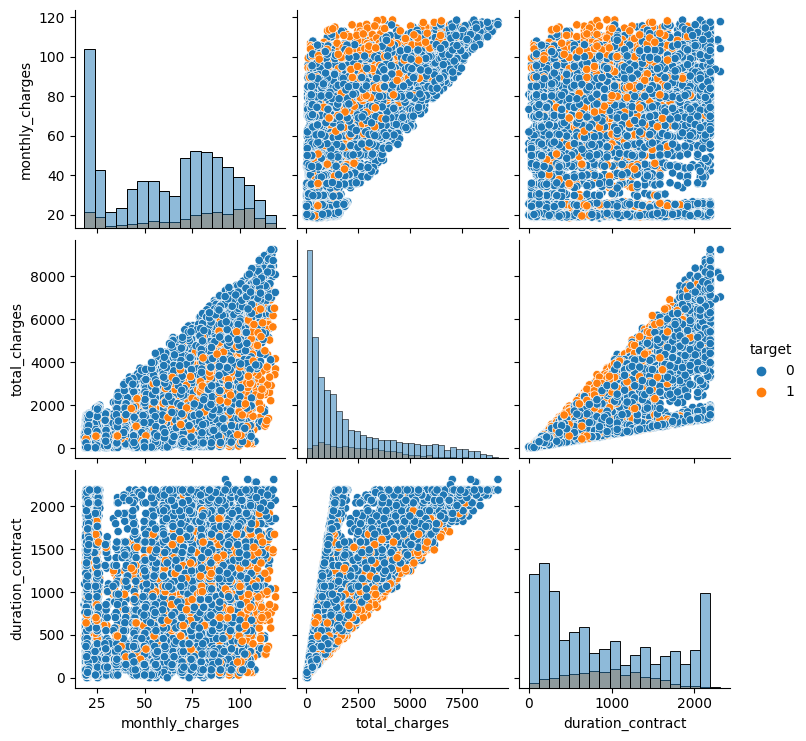

In [31]:
sns.pairplot(df, hue='target', diag_kind='hist');

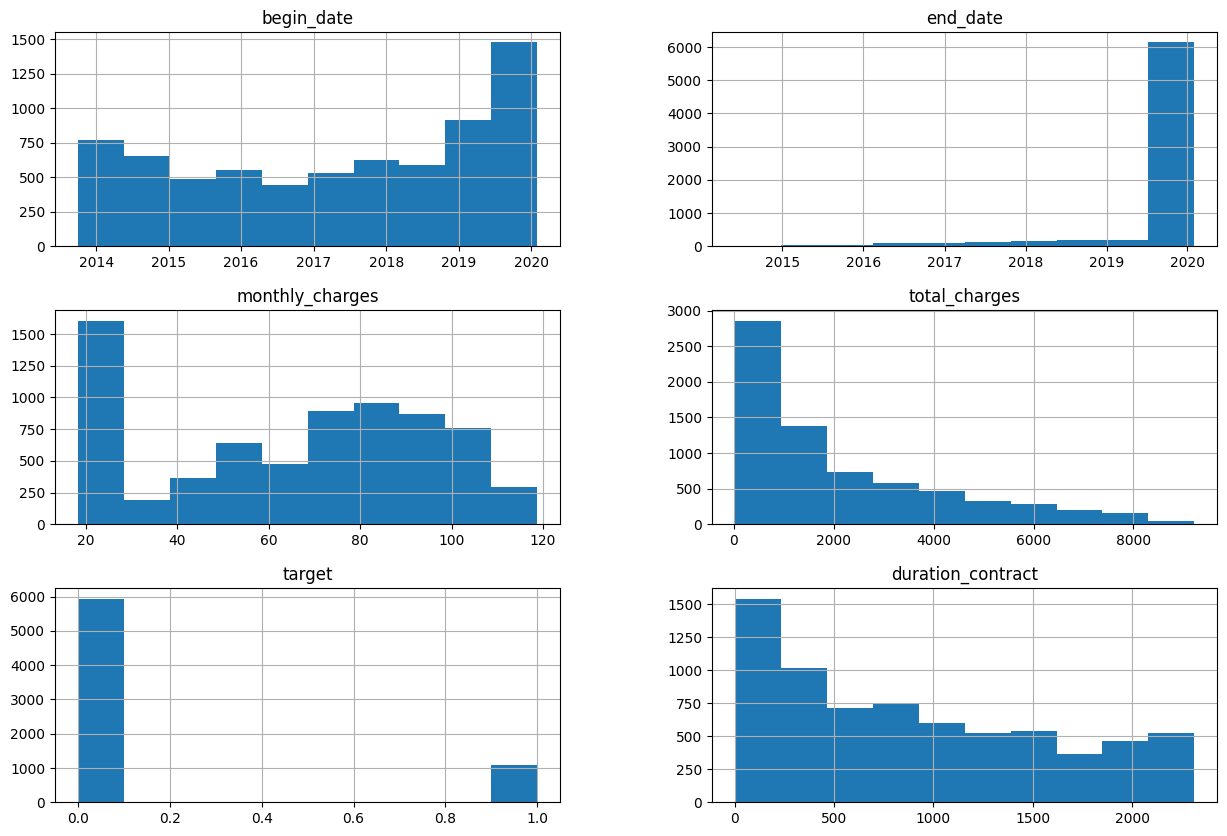

In [32]:
df.hist(figsize=(15, 10));

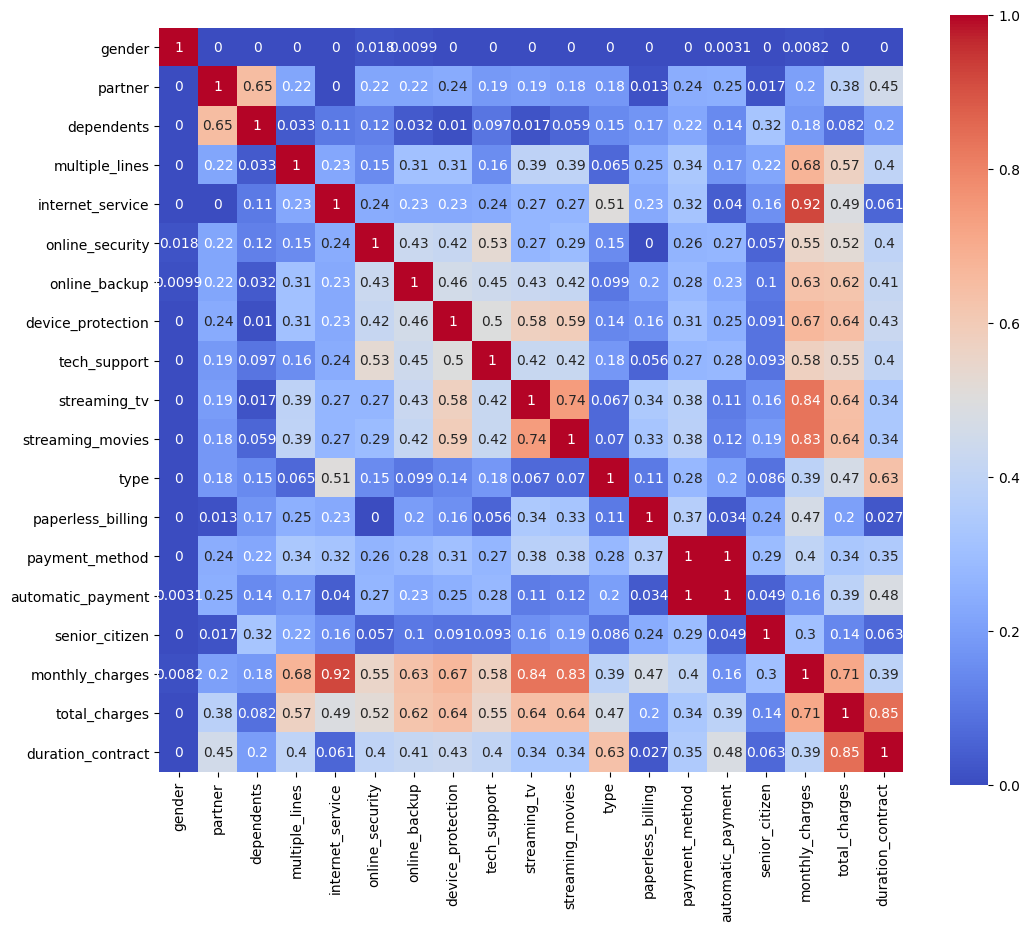

In [33]:
#выберем категориальные признаки
categorical_columns = ['gender', 'partner', 'dependents', 'multiple_lines', 'internet_service', 'online_security',
                       'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
                       'type', 'paperless_billing', 'payment_method', 'automatic_payment', 'senior_citizen']

numeric_columns = ['monthly_charges', 'total_charges', 'duration_contract']


subset = df[categorical_columns + numeric_columns]

#матрица зависимости phik
phik_matrix = subset.phik_matrix(interval_cols=numeric_columns)

#тепловая карта 
plt.figure(figsize=(12, 10))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', square=True)

plt.show()



- Наблюдаются следующие сильные связи:
    - Большая связь между признаками `partner` и `dependents` - `0.65`, что означает, что наличие партнера влияет на наличие иждивенцев.
    - Признаки `monthly_charges` и `total_charges` имеют высокую связь между собой - `0.71`, что ожидаемо, так как общая сумма платежей зависит от ежемесячной платы.
    - Сильная связь между признаками `internet_service` и `streaming_tv` - `0.74` и между `internet_service` и `streaming_movies` - `0.74`, что означает, что наличие интернета сильно влияет на возможность просмотра тв и фильмов в потоке.
    - Коэффициент между признаками `streaming_tv` и `monthly_charges` - `0.84` и между `streaming_movies` и `monthly_charges` - `0.83`, указывает на высокую связь между наличием потокового телевидения и ежемесячными платежами.
    - Коэффициент между признаками `internet_service` и `monthly_charges` - `0.91` и между `internet_service` и `total_charges` - `0.71`, указывает на высокую связь между наличием интернета и ежемесячными/общими платежами.
    - Коэффициент корреляции между `total_charges` и `duration_contract` составляет `0.82`. Это указывает на высокую корреляционную связь между общей суммой платежей и длительностью договора. Чем дольше длится договор, тем больше общая сумма платежей.
- Низкие значения в матрице указывают на отсутствие связи или слабую взаимосвязь между признаками.
- Не наблюдается явных признаков мультиколлинеарности.

Построим гистограмму оттока клиентов, убрав данные за `2020-02-01`, т.к. эти клиенты все еще пользуются услугами.

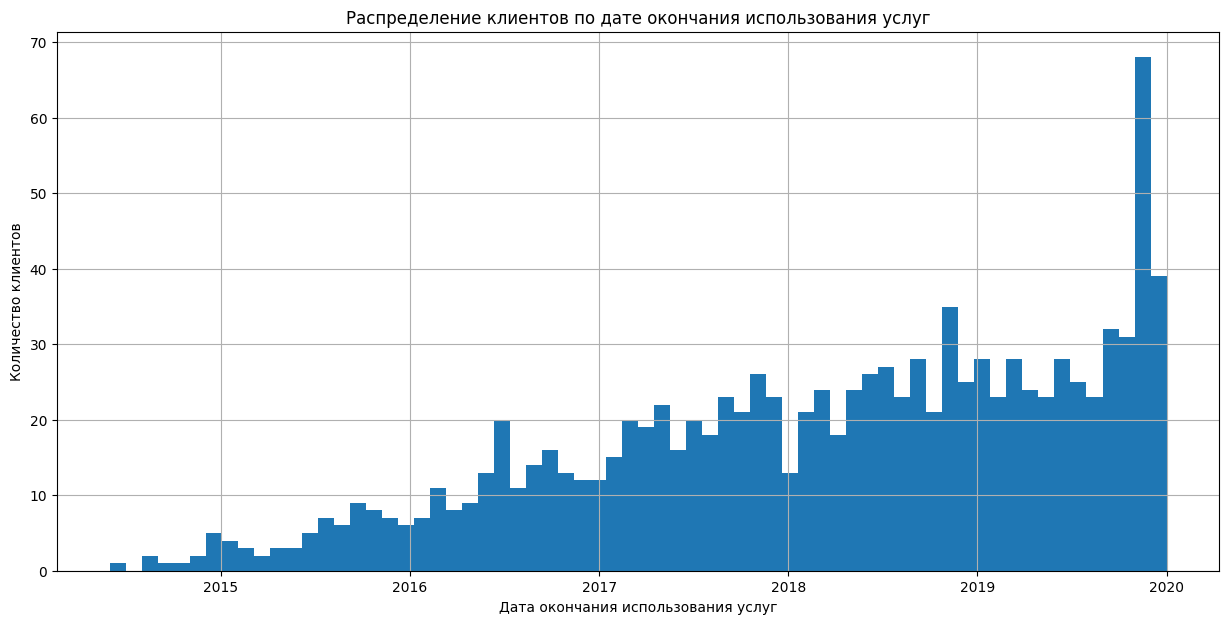

In [34]:
df.query('end_date != "2020-02-01"').hist('end_date', bins=66, figsize=(15, 7))
plt.xlabel('Дата окончания использования услуг')
plt.ylabel('Количество клиентов')
plt.title('Распределение клиентов по дате окончания использования услуг')
plt.show()


С каждым годом отток клиентов увеличивается, а в конце 2020 года наблюдается пик оттока.

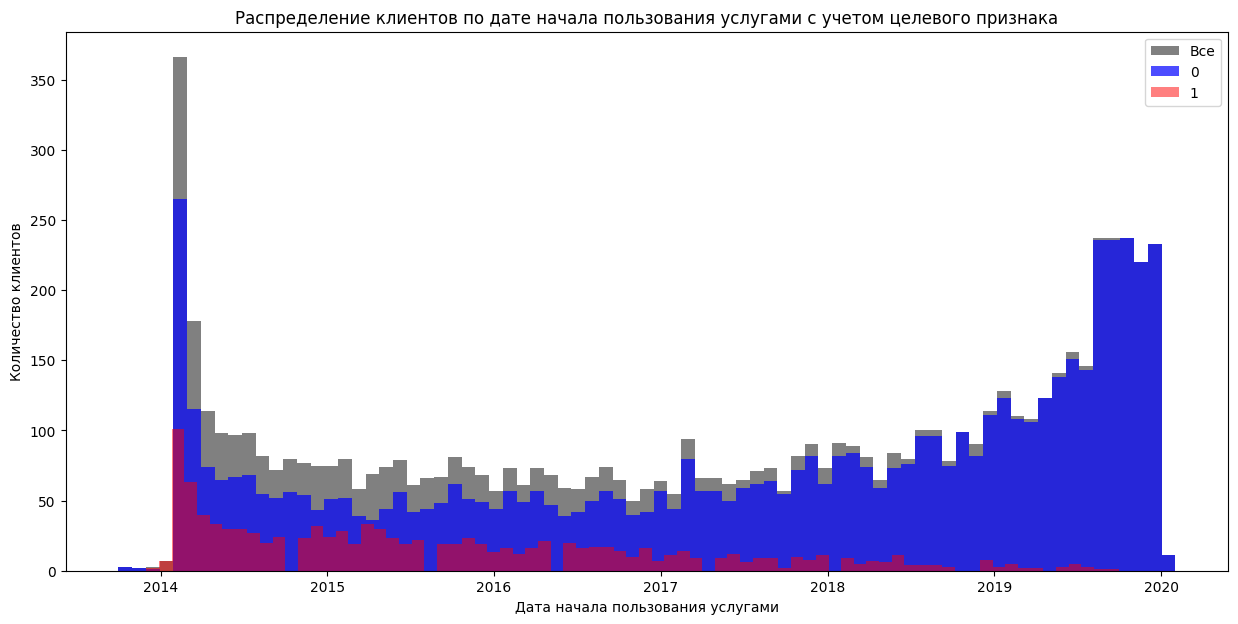

In [35]:
plt.figure(figsize=(15, 7))
plt.hist(df['begin_date'], bins=77, color='gray', alpha=1, label='Все')
plt.hist(df[df['target'] == 0]['begin_date'], bins=77, color='blue', alpha=0.7, label='0')
plt.hist(df[df['target'] == 1]['begin_date'], bins=77, color='red', alpha=0.5, label='1')

plt.xlabel('Дата начала пользования услугами')
plt.ylabel('Количество клиентов')
plt.title('Распределение клиентов по дате начала пользования услугами с учетом целевого признака')
plt.legend()
plt.show()


В начале заметен большой приток клиентов, возможно после рекламной компании. Далее количество клиентов выходит на плато и с 2019 по 2020 год наблюдается рост клиентской базы.

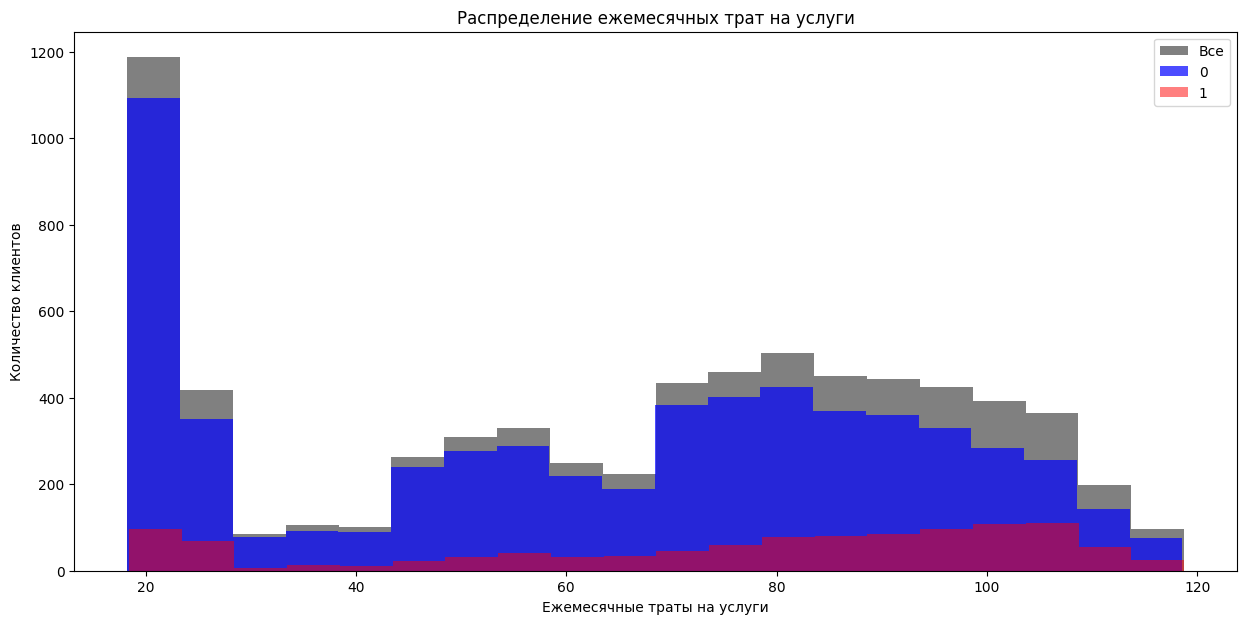

In [36]:
plt.figure(figsize=(15, 7))
plt.hist(df['monthly_charges'], bins=20, color='gray', alpha=1, label='Все')
plt.hist(df[df['target'] == 0]['monthly_charges'], bins=20, color='blue', alpha=0.7, label='0')
plt.hist(df[df['target'] == 1]['monthly_charges'], bins=20, color='red', alpha=0.5, label='1')

plt.xlabel('Ежемесячные траты на услуги')
plt.ylabel('Количество клиентов') 
plt.title('Распределение ежемесячных трат на услуги')
plt.legend()
plt.show()

Большая часть клиентов ежемесячно трятят до `30`, так же выделяются еще 2 группы, с тратами от `30` до `70` и от `70` до `120`.

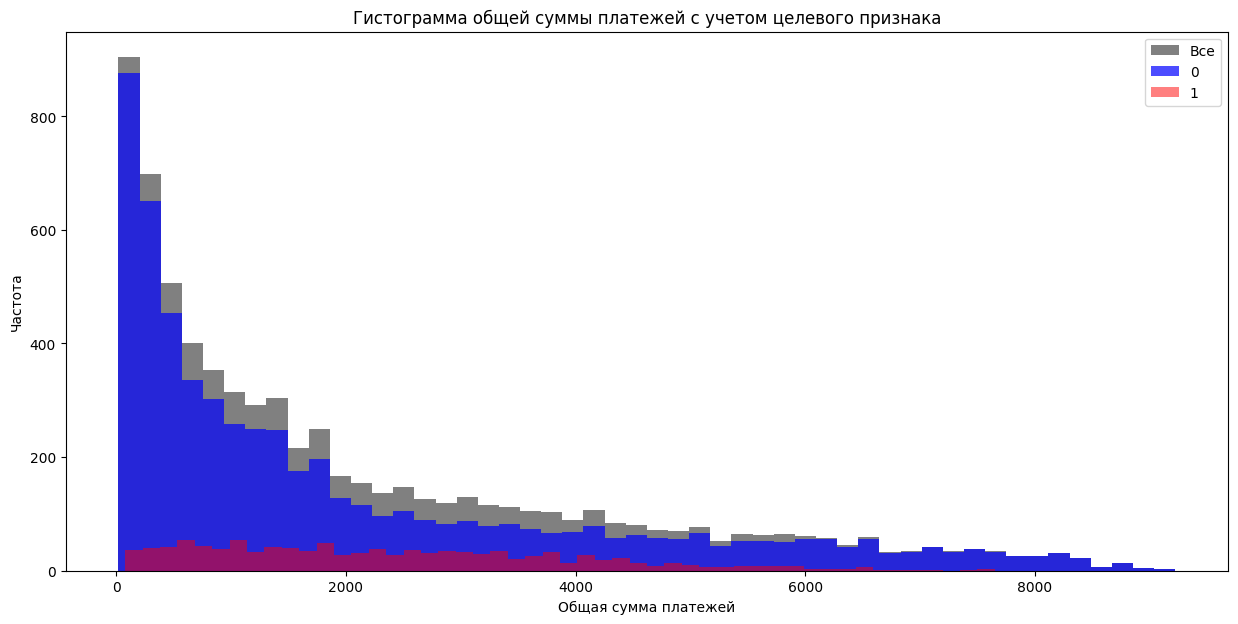

In [37]:
plt.figure(figsize=(15, 7))
plt.hist(df['total_charges'], bins=50, color='gray', alpha=1, label='Все')
plt.hist(df[df['target'] == 0]['total_charges'], bins=50, color='blue', alpha=0.7, label='0')
plt.hist(df[df['target'] == 1]['total_charges'], bins=50, color='red', alpha=0.5, label='1')

plt.xlabel('Общая сумма платежей')
plt.ylabel('Частота')
plt.title('Гистограмма общей суммы платежей с учетом целевого признака')
plt.legend()
plt.show()

У большинства клиентов общая сумма платежей меньше 2000

In [38]:
df['total_charges'].value_counts().head(30)

20.45      6
101.00     5
19.65      4
732.60     4
40.10      4
21.53      4
255.00     4
1007.50    4
2421.90    3
2555.00    3
279.00     3
378.00     3
19.55      3
101.75     3
1192.80    3
306.00     3
149.80     3
265.20     3
6624.00    3
22.00      3
760.50     3
957.60     3
20.05      3
1155.00    3
663.30     3
917.70     3
1008.80    3
40.70      3
19.45      3
20.25      3
Name: total_charges, dtype: int64

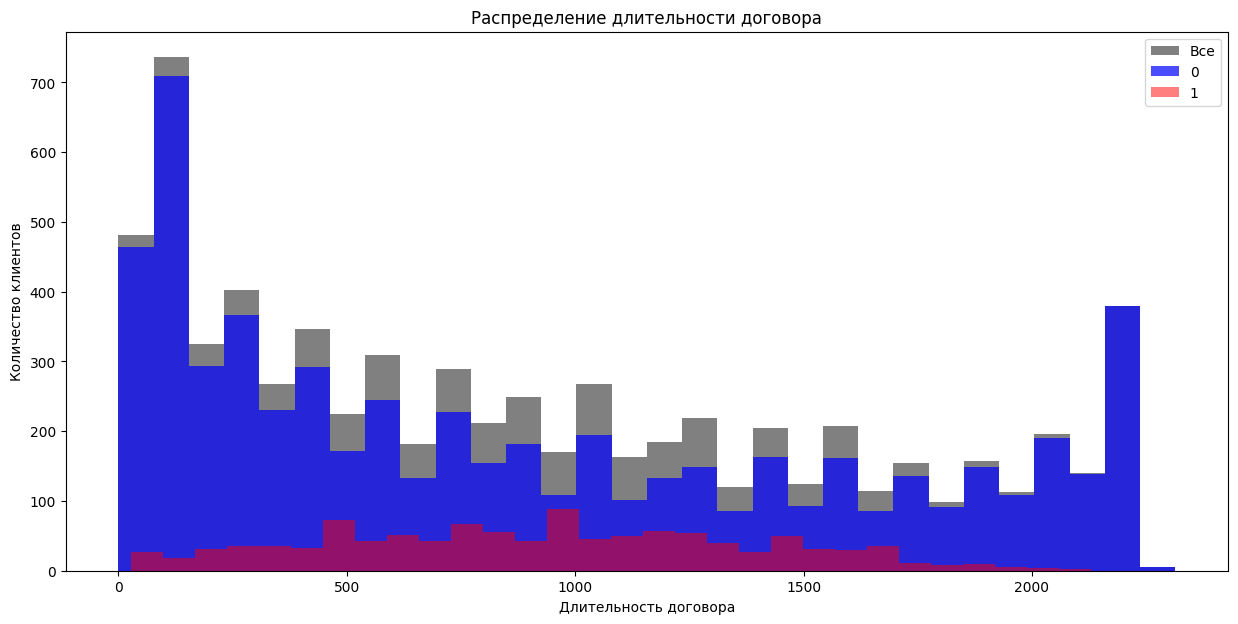

In [39]:

plt.figure(figsize=(15, 7))
plt.hist(df['duration_contract'], bins=30, color='gray', alpha=1, label='Все')
plt.hist(df[df['target'] == 0]['duration_contract'], bins=30, color='blue', alpha=0.7, label='0')
plt.hist(df[df['target'] == 1]['duration_contract'], bins=30, color='red', alpha=0.5, label='1')

plt.xlabel('Длительность договора')
plt.ylabel('Количество клиентов')
plt.title('Распределение длительности договора')
plt.legend()
plt.show()

Большинство клиентов пользуются услугами меньше 500 дней. А вот старые клиенты, которые пользуются услугами больше 1750 дней, меньше склонны к уходу.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   gender             7043 non-null   object        
 2   senior_citizen     7043 non-null   object        
 3   partner            7043 non-null   object        
 4   dependents         7043 non-null   object        
 5   multiple_lines     7043 non-null   object        
 6   internet_service   7043 non-null   object        
 7   online_security    7043 non-null   object        
 8   online_backup      7043 non-null   object        
 9   device_protection  7043 non-null   object        
 10  tech_support       7043 non-null   object        
 11  streaming_tv       7043 non-null   object        
 12  streaming_movies   7043 non-null   object        
 13  begin_date         7043 non-null   datetime64[ns]
 14  end_date

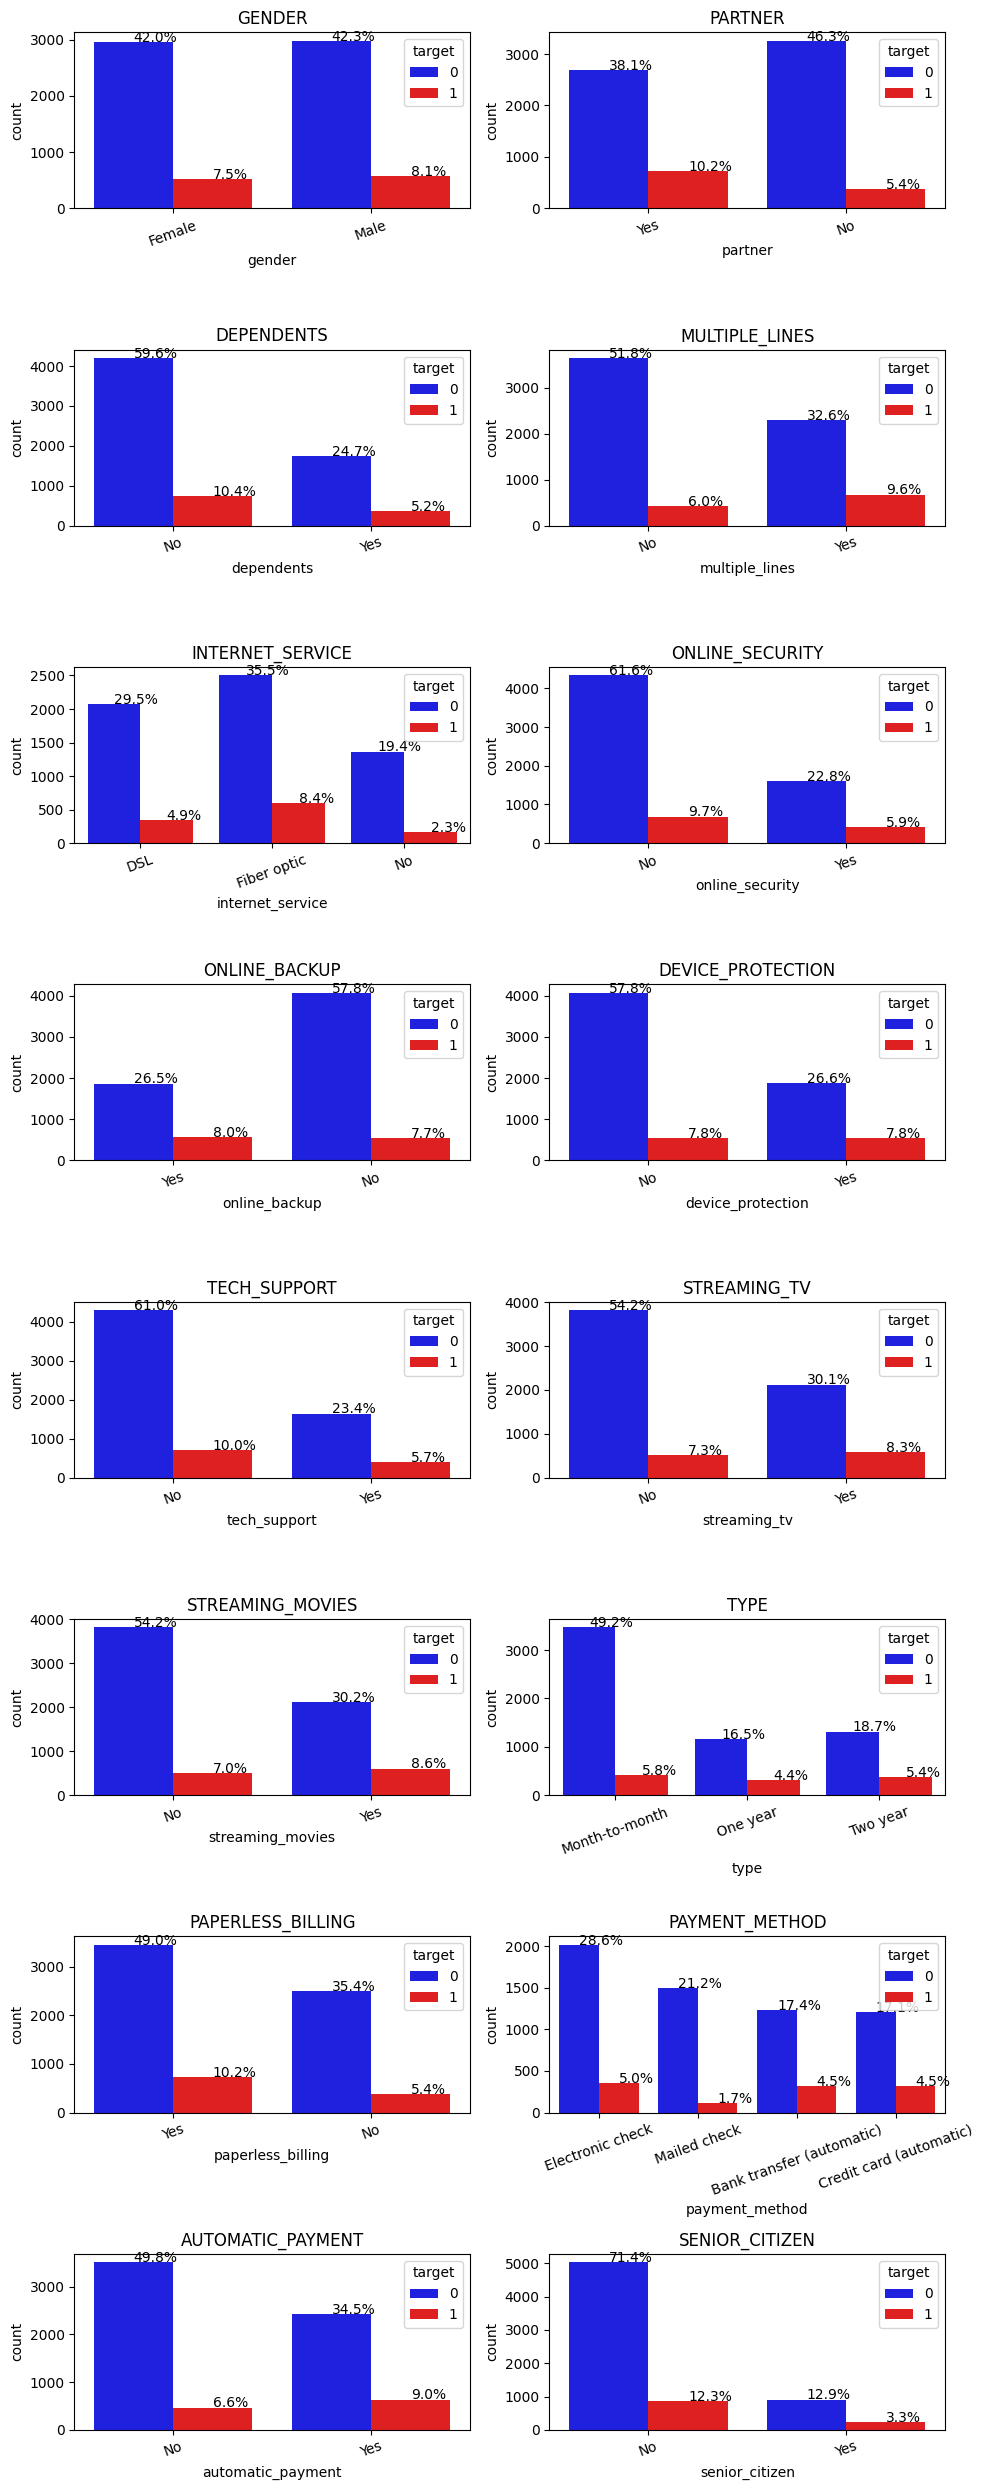

In [41]:
cols = 2 #количество столбцов в сетке
rows = round(len(categorical_columns) / cols)  #количество строк в сетке


fig, axes = plt.subplots(rows, cols)
#цикл для построения столбчатых диаграмм
for i, col in enumerate(categorical_columns):
    ax = plt.subplot(rows, cols, i + 1)
    sns.countplot(x=col, data=df, hue='target', palette=['b', 'r'], ax=ax)
    ax.set_title(col.upper())
    ax.figure.set_size_inches(10, 25)
    plt.xticks(rotation=20)
    
    #процентное соотношение
    total = float(len(df))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 3, f'{height/total:.1%}')

plt.tight_layout()
plt.show()


- Распределине ушедших/не ушедших клиентов по полу примерно одинаковое
- Из `~15%` ушедших клиентов `~10%` имели озможности ведения параллельных линий во время звонка, а  это примерно четверть от общего числа клиентов пользовавшихся это услугой.
- Так же почти `четверть` клиентов с услугами `Online Backup` и `Device Protection` ушли.
- Больше половины клиетов, которые продолжают пользоваться услугами, имеют ежемесячный тип оплаты.

Вывод:
- Изучили общую информацию о данных
- Исследовали числовые и категориальные признаки с помощью матрицы корреляции.

## Обучение

Отбросим лишние признаки

In [42]:
df = df.drop(['customer_id', 'begin_date', 'end_date'],  axis=1)

In [43]:
target = df['target']
features = df.drop('target', axis=1)

features_train, features_test, target_train, target_test = train_test_split(features,
                                                                              target, 
                                                                              test_size=0.25, 
                                                                              random_state=RANDOM_STATE)

print('FEATURES:')
print(f'Train {features_train.shape}\n\
Test{features_test.shape}')
print('#'*20)
print('TARGET:')
print(f'Train {target_train.shape}\n\
Test{target_test.shape}')

FEATURES:
Train (5282, 19)
Test(1761, 19)
####################
TARGET:
Train (5282,)
Test(1761,)


In [44]:
#Код ревьюера
numeric_columns

['monthly_charges', 'total_charges', 'duration_contract']

### LogisticRegression

In [45]:
#создание препроцессора
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(drop='first',
                              handle_unknown='ignore'), categorical_columns)
    ])

In [46]:
%%time
#модель LogisticRegression
model_lr = LogisticRegression(random_state=RANDOM_STATE)

#создание пайплайна
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', model_lr)])

#кросс-валидация
scores_lr = cross_val_score(pipeline_lr,
                         features_train,
                         target_train,
                         cv=5,
                         scoring='roc_auc')

pipeline_lr.fit(features_train, target_train)

#вывод средней оценки
print('ROC-AUC', scores_lr.mean())

ROC-AUC 0.7586599703137477
CPU times: total: 406 ms
Wall time: 382 ms


### RandomForestClassifier

In [47]:
%%time

#модель RandomForestClassifier
model_rf = RandomForestClassifier(random_state=RANDOM_STATE)
#создание пайплайна
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', model_rf)])
#набор гипепараметров

parametrs_rf = {
    'classifier__n_estimators': range(10, 350, 10),
    'classifier__max_depth': range(2, 20),
    'classifier__min_samples_split': (2, 3, 4),
    'classifier__min_samples_leaf': (1, 2, 3, 4)
}

#подбор гипепараметров
rf_cv = RandomizedSearchCV(
    pipeline_rf, 
    parametrs_rf, 
    cv=5, 
    scoring='roc_auc',
    n_jobs=-1,
    n_iter=100,
    random_state=RANDOM_STATE
)

#обучение модели
rf_cv.fit(features_train, target_train)
print('Лучшие параметры:', rf_cv.best_params_)
print('ROC-AUC', rf_cv.best_score_)

Лучшие параметры: {'classifier__n_estimators': 130, 'classifier__min_samples_split': 3, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': 8}
ROC-AUC 0.8171916882862824
CPU times: total: 3.91 s
Wall time: 29 s


In [48]:
model_rf = RandomForestClassifier(random_state=RANDOM_STATE,
                                  n_estimators=130,
                                  min_samples_split=3,
                                  min_samples_leaf=1,
                                  max_depth=8)

pipeline_rf.fit(features_train, target_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['monthly_charges',
                                                   'total_charges',
                                                   'duration_contract']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'partner',
                                                   'dependents',
                                                   'multiple_lines',
                                                   'internet_service',
                                                   'online_security',
                                                   'online_backup',
                                                   'device_protection',
                                                   'tech_support',
                                                   'streaming_tv',
                                                   'streaming_movies', 'type',
                                                   'paperless_billing',
                                                   'payment_method',
                                                   'automatic_payment',
                                                   'senior_citizen'])])),
                ('classifier', RandomForestClassifier(random_state=220523))])

### CatBoostClassifier

In [49]:
%%time

#модель CatBoostClassifier
model_cat = CatBoostClassifier(eval_metric='AUC', verbose=500, random_seed=RANDOM_STATE)

# Определение сетки параметров для поиска
param_grid = {
    'iterations': [1000],
    'learning_rate': [0.01, 0.1],
    'depth': [None, 2, 4]
}


# Создание объекта GridSearchCV
random_search = GridSearchCV(
    estimator=model_cat,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='roc_auc'
)

# Обучение модели с использованием RandomizedSearchCV
random_search.fit(features_train, target_train, cat_features=categorical_columns)

# Вывод лучших параметров и ROC-AUC
print('Best parameters:', random_search.best_params_)
print('Best ROC-AUC:', random_search.best_score_)

0:	total: 180ms	remaining: 2m 59s
500:	total: 13.9s	remaining: 13.8s
999:	total: 28.2s	remaining: 0us
Best parameters: {'depth': 4, 'iterations': 1000, 'learning_rate': 0.1}
Best ROC-AUC: 0.9090381370484621
CPU times: total: 1min 14s
Wall time: 2min 18s


In [50]:
model_cat = CatBoostClassifier(eval_metric='AUC',
                               verbose=500,
                               depth= 4,
                               iterations=1000,
                               learning_rate=0.1,
                               random_seed=RANDOM_STATE)
model_cat.fit(features_train, target_train, cat_features=categorical_columns)

0:	total: 22.5ms	remaining: 22.5s
500:	total: 14.2s	remaining: 14.1s
999:	total: 28.8s	remaining: 0us


Вывод:

По итогам кросс-валидации имеем следущие результаты ROC-AUC:

- LogisticRegression - `0.758`
- RandomForestClassifier - `0.817`
- CatBoostClassifier - `0.909`

`CatBoostClassifier` показывает лучший результат, превышая как `LogisticRegression` , так и `RandomForestClassifier` по значению ROC AUC.

## Тестирование модели

In [51]:
# Тестирование модели
predictions = model_cat.predict(features_test)
probabilities = model_cat.predict_proba(features_test)
probabilities_one = probabilities[:, 1]

F1: 0.740
Precision: 0.909
Recall: 0.624
Accuracy: 0.936
ROC-AUC: 0.941


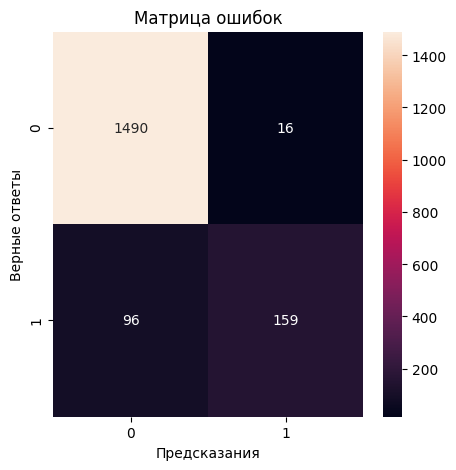

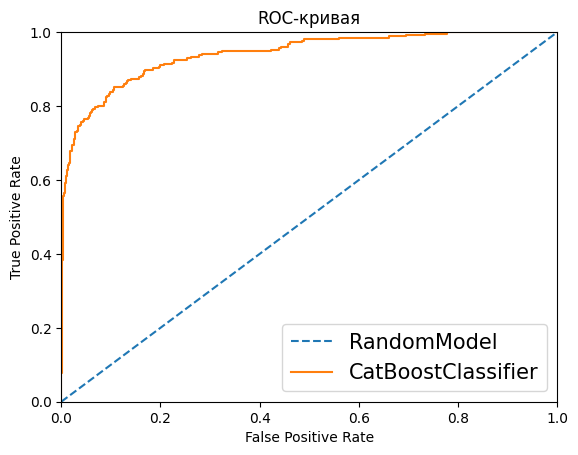

In [52]:

#оценка метрик на тестовой выборке
f1 = f1_score(target_test, predictions)
precision = precision_score(target_test, predictions)
recall = recall_score(target_test, predictions)
accuracy = accuracy_score(target_test, predictions)
roc_auc = roc_auc_score(target_test, probabilities_one)

print(f'F1: {f1:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'Accuracy: {accuracy:.3f}')
print(f'ROC-AUC: {roc_auc:.3f}')

#матрица ошибок
matrix = confusion_matrix(target_test, predictions)

plt.figure(figsize=(5, 5))
sns.heatmap(matrix, annot=True, fmt='d')
plt.title('Матрица ошибок')
plt.ylabel('Верные ответы')
plt.xlabel('Предсказания')
plt.show()

#plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one)
plt.plot(fpr, tpr, label='CatBoostClassifier')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='15')

plt.title("ROC-кривая")
plt.show()


Исходя из результатов тестирования модели CatBoostClassifier, можно сделать следующие выводы:

- `F1-мера` модели составляет `0.740`, что означает, что модель достаточно хорошо сбалансирована по метрикам точности и полноты.
- `Точность (Precision)` модели составляет `0.909`, что указывает на высокую долю правильно классифицированных положительных примеров.
- `Полнота (Recall)` модели составляет `0.624`, что указывает на способность модели обнаруживать большую часть положительных примеров.
- `Точность (Accuracy`) модели составляет `0.936`, что означает, что модель правильно классифицирует `93.6%` образцов.
- `ROC-AU`C модели составляет `0.941`, что свидетельствует о хорошей способности модели разделять классы и правильно ранжировать вероятности.

Матрица ошибок показывает следующие значения:

- `Верно классифицированных отрицательных примеров (True Negative)` - 1490.
- `Ложно классифицированных отрицательных примеров (False Negative)` - 96.
- `Верно классифицированных положительных примеров (True Positive)` - 159.
- `Ложно классифицированных положительных примеров (False Positive)` - 16.

В целом, модель CatBoostClassifier демонстрирует хорошие результаты.

### Анализ важности признаков

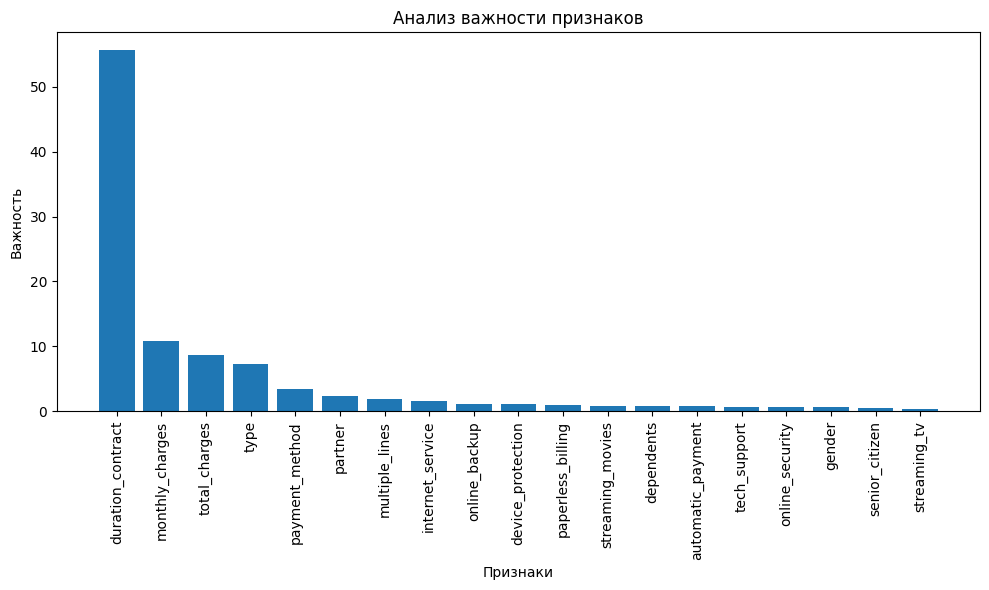

In [53]:
#получение важностей признаков
feature_importance = model_cat.feature_importances_

#получение названий признаков
feature_names = np.array(model_cat.feature_names_)

#сортировка признаков по их важности
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

#построение графика
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importance)), sorted_feature_importance)
plt.xticks(range(len(sorted_feature_importance)), sorted_feature_names, rotation='vertical')
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.title('Анализ важности признаков')
plt.tight_layout()
plt.show()


Исходя из важности признаков, полученных при анализе модели, можно сделать следующие выводы:

Наиболее важными признаками для модели являются:

- `duration_contract` - продолжительность договора
- `monthly_charges` - ежемесячные платежи
- `total_charges` - общие платежи
- `type` - тип оплаты
- `payment_method` - способ оплаты

Остальные признаки имеют меньшую значимость, но все равно вносят свой вклад в модель.

Вывод:

- Проведен анализ данных и предобработка: выполнена загрузка и исследование данных, заполнение пропущенных значений, добавление новых признаков.

- Проведено исследование различных моделей машинного обучения: `Logistic Regression`, `Random Forest Classifier` и `CatBoost Classifier`. Каждая модель была обучена с использованием кросс-валидации и оценена по метрике ROC-AUC

- `CatBoost Classifier` продемонстрировал наилучшие результаты с высокими значениями F1-меры `0.740`, точности `0.909`, полноты `0.624`, точности классификации `0.936` и показателем ROC-AUC `0.941`. Модель `CatBoost Classifier` была выбрана в качестве предпочтительной для решения задачи классификации оттока клиентов.

Исходя из полученных результатов и заданной бизнес-метрики `AUC-ROC > 0.85`, можно сделать вывод, что модель `CatBoostClassifier` демонстрирует хорошие результаты и потенциально может быть использована для предсказания оттока клиентов.

## Отчет о проделанной работе 

Выполненные пункты плана:

- [x] Загрузка и ознакомление с данными:


  - Загрузили файлы phone_new.csv, internet_new.csv, personal_new.csv и contract_new.csv.
  - Используя профилирование данных получили общую информацию о каждом наборе данных, включая статистические показатели, типы переменных, пропущенные значения и уникальные значения.

- [x] Предварительная обработка данных:


  - Объединить наборы данных по общему идентификатору клиента customerID.
  - Привели столбцы к sanke_case
  - Обработали пропуски.
  - Привели столбцы к необходимым тимпам данных
  - Создали 3 признака:
      - target - целевой признак
      - duration_contract - длительность договора
      - automatic_payment - использует ли клиент автоматический вид оплаты
  - Преобразовать категориальные переменные в числовые (например, с помощью кодирования One-Hot или Label Encoding) для   возможности использования их в модели.
  
- [x] Исследовательский анализ данных:


   - Изучили общую информацию о данных с помощью гистограмм и столбчатых диаграмм
   - Исследовали зависимость числовых и категориальных признаков с помощью матрицы корреляции Phik.
   - Удалили 3 неинформативных для модели признака 'customer_id', 'begin_date', 'end_date'

- [x] Построение модели:


    - Обучили 3 модели (LogisticRegression, RandomForestClassifier и CatBoostClassifier) с помощью кросс-валидации и подбора гиперпараметров.
    - По итогам кросс-валидации получили следующие результаты ROC-AUC:
        - LogisticRegression - 0.758
        - RandomForestClassifier - 0.817
        - CatBoostClassifier - 0.909
    - Выбрали модель CatBoostClassifier, т.к. она имет самый высокий показатель метрики ROC-AUC

- [x] Тестирование модели:


   - Провели тестирование модели на тестовой выборке
   - Посчитали местрики: F1, Recall, Precision, Accuracy и ROC-AUC
   - Визуализировали матрицу ошибок и построили ROC-кривую
   - Проанализировали важность признаков

- [x] Отчет:


   - Составили отчет о проделанной работе
   
   
В ходе работы над проектом возникали следующие трудности:

- Обработка пропущенных значений: В исходных данных были обнаружены пропущенные значения в столбце TotalCharges, которые потребовалось обработать. Было обнаруженно что пропуски присутствовали, только у новых пользователе, которые начали пользоваться услугами в день выгрузки данных. Пропуски заполнили значениями столбца MonthlyCharges.

- Обработка категориальных признаков: Исходные данные содержали категориальные признаки, которые требовалось преобразовать в числовые для обучения моделей. Для этого был использован подход One-Hot Encoding, который создает бинарные флаги для каждой уникальной категории.

- Выбор оптимальной модели и настройка гиперпараметров: Было необходимо выбрать наиболее подходящую модель и настроить ее гиперпараметры для достижения наилучшего качества.

Все вышеуказанные трудности были преодолены путем анализа данных, применения методов предобработки и выбора оптимальных моделей с настройкой гиперпараметров.

Для обучения модели были использованы следующие признаки:

- `duration_contract` - продолжительность договора
- `monthly_charges` - ежемесячные платежи
- `total_charges` - общие платежи
- `type` - тип оплаты
- `payment_method` - способ оплаты
- `partner` - наличие супруги(а)
- `multiple_lines` - наличие нескольких линий связи
- `internet_service` - наличие интернет-услуги
- `online_backup` - наличие резервного копирования онлайн
- `device_protection` - защита устройства
- `paperless_billing` - электронный платёжный документ
- `streaming_movies` - потоковое воспроизведение фильмов
- `dependents` - наличие иждивенцев
- `automatic_payment` - автоматический платеж
- `tech_support` - техническая поддержка
- `online_security` - онлайн-безопасность
- `gender` - пол
- `senior_citizen` - наличие пенсионного статуса по возрасту
- `streaming_tv` - потоковое воспроизведение телевидения

В итоге была выбрана модель CatBoostClassifier с использованием следующих гиперпараметров:

- `eval_metric`: 'AUC'
- `verbose`: 500
- `depth`: 4
- `iterations`: 1000
- `learning_rate`: 0.1
- `random_seed`: RANDOM_STATE (значение не указано в предоставленном коде)
Качество модели на тестовой выборке составляет:

- `F1-мера`: 0.740
- `Precision`: 0.909
- `Recall`: 0.624
- `Accuracy`: 0.936
- `ROC-AUC`: 0.941
- Модель классифицировала 1490 отрицательных примеров верно (True Negative), 96 отрицательных примеров были ложно классифицированы как положительные (False Negative), 159 положительных примеров были верно классифицированы (True Positive), и 16 положительных примеров были ложно классифицированы как отрицательные (False Positive).

Модель показывает хорошие результаты ROC-AUC (0.941), что означает высокую способность модели разделять классы. Также модель достигает высокой точности (0.936) и хорошей полноты (0.624). Значение F1-меры (0.740) указывает на баланс между точностью и полнотой модели. Матрица ошибок показывает небольшое количество ложно классифицированных примеров.

Таким образом, модель с выбранными гиперпараметрами продемонстрировала хорошую способность предсказывать отток клиентов.